<a href="https://colab.research.google.com/github/EgorMatveev26/Datasets/blob/main/%D0%9C%D0%B0%D1%82%D0%B2%D0%B5%D0%B5%D0%B2_%D0%95_%2C_%D0%98%D0%91%D0%90%D0%A1_21%2C_%D0%9B%D0%A0_2_1_%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Загрузка данных
Используемый набор данных содержит информацию о различных видах рыб. Каждая строка представляет отдельный экземпляр рыбы, а столбцы содержат следующие переменные:
- **Species**: Вид
- **Weight**: Вес
- **Length1**: Длина 1: первое измерение длины рыбы.
- **Length2**: Длина 2: второе измерение длины рыбы.
- **Length3**: Длина 3: третье измерение длины рыбы.
- **Height**: Высота
- **Width**: Ширина

URL-адрес набора данных:

https://raw.githubusercontent.com/EgorMatveev26/Datasets/main/Fish.csv

In [ ]:
# Присвоим переменной «url» ссылку на датасет:

url = 'https://raw.githubusercontent.com/EgorMatveev26/Datasets/main/Fish.csv'

# Создаем лист с названием столбцов:

cols = ['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

# Используем Pandas read_csv():

dataset = pd.read_csv(url, names = cols)

In [ ]:
# Размер датасета, 159 записей, 7 столбцов

dataset.shape

(159, 7)

In [ ]:
# Отображаем первые 10 строк датасета

dataset.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [ ]:
# Метод Pandas info()  выводит очень много информации о наборе данных - количество записей,
# количество ненулевых значений в каждом столбце, тип данных в столбце

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
# Pandas describe() используется для просмотра  основной статистической информации, таких как процентиль, среднее,
# стандартное отклонение и т.д. фрейма данных или ряда числовых значений:

dataset.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
dataset['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
# Теперь проверим количество строк, которое принадлежит каждому виду рыб:

dataset['Species'].value_counts()

,count
Species,
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


Набор данных не является сбалансированным, так как распределение экземпляров по видам сильно различается.

# Визуализация данных

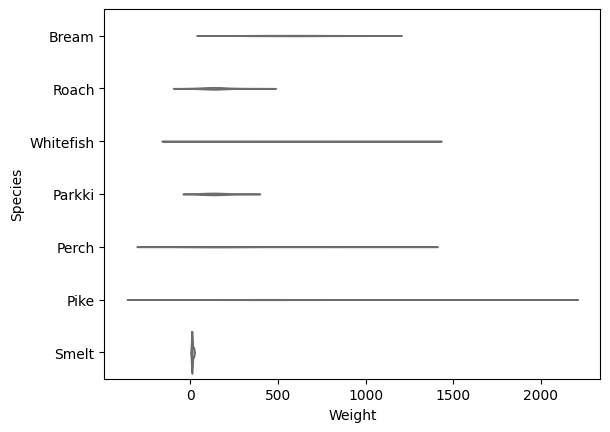

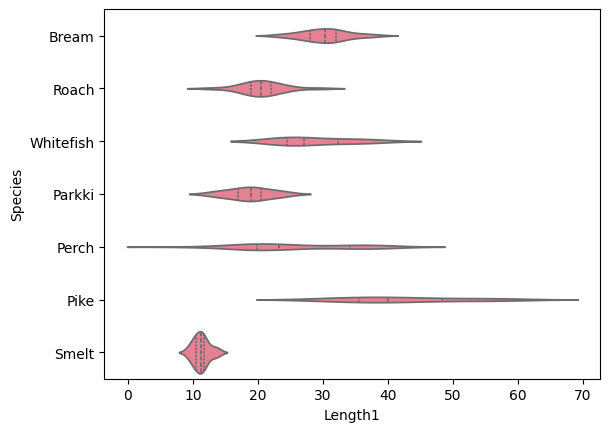

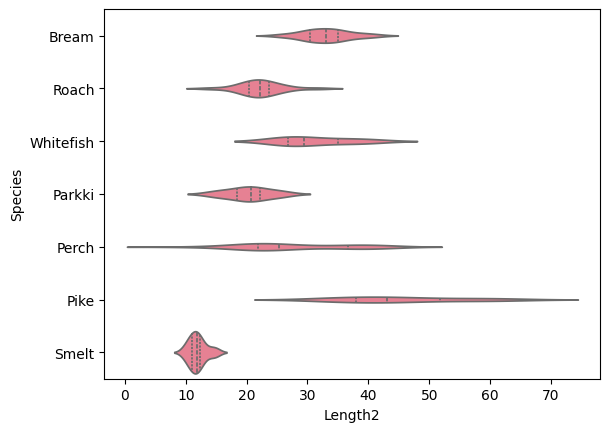

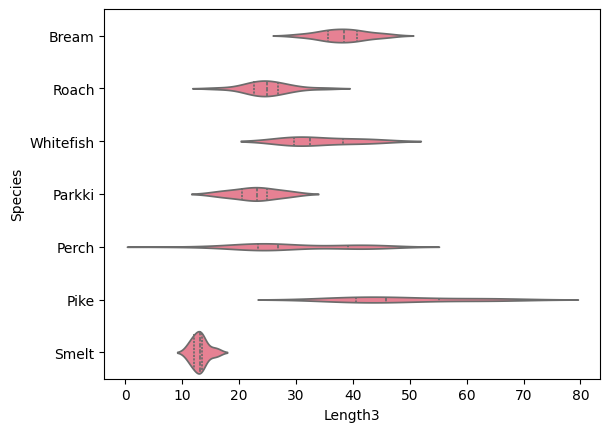

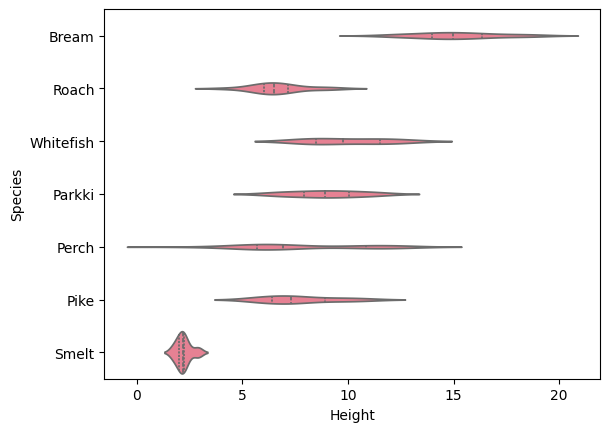

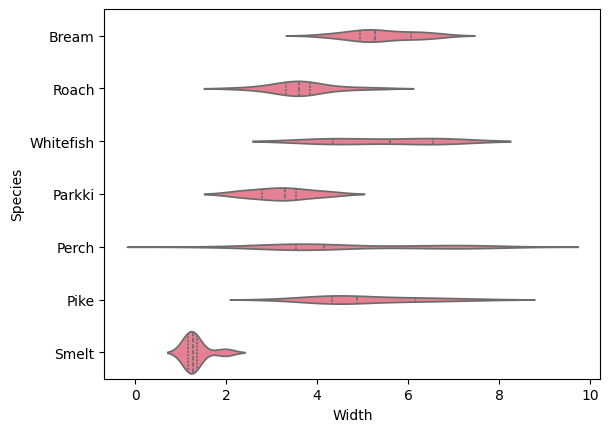

In [ ]:
# Скрипичный график.
# Используется для проверки сравнения распределения переменных:

sns.violinplot(y='Species', x='Weight', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='Length1', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='Length2', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='Length3', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='Height', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='Width', data=dataset, inner='quartile')
plt.show()

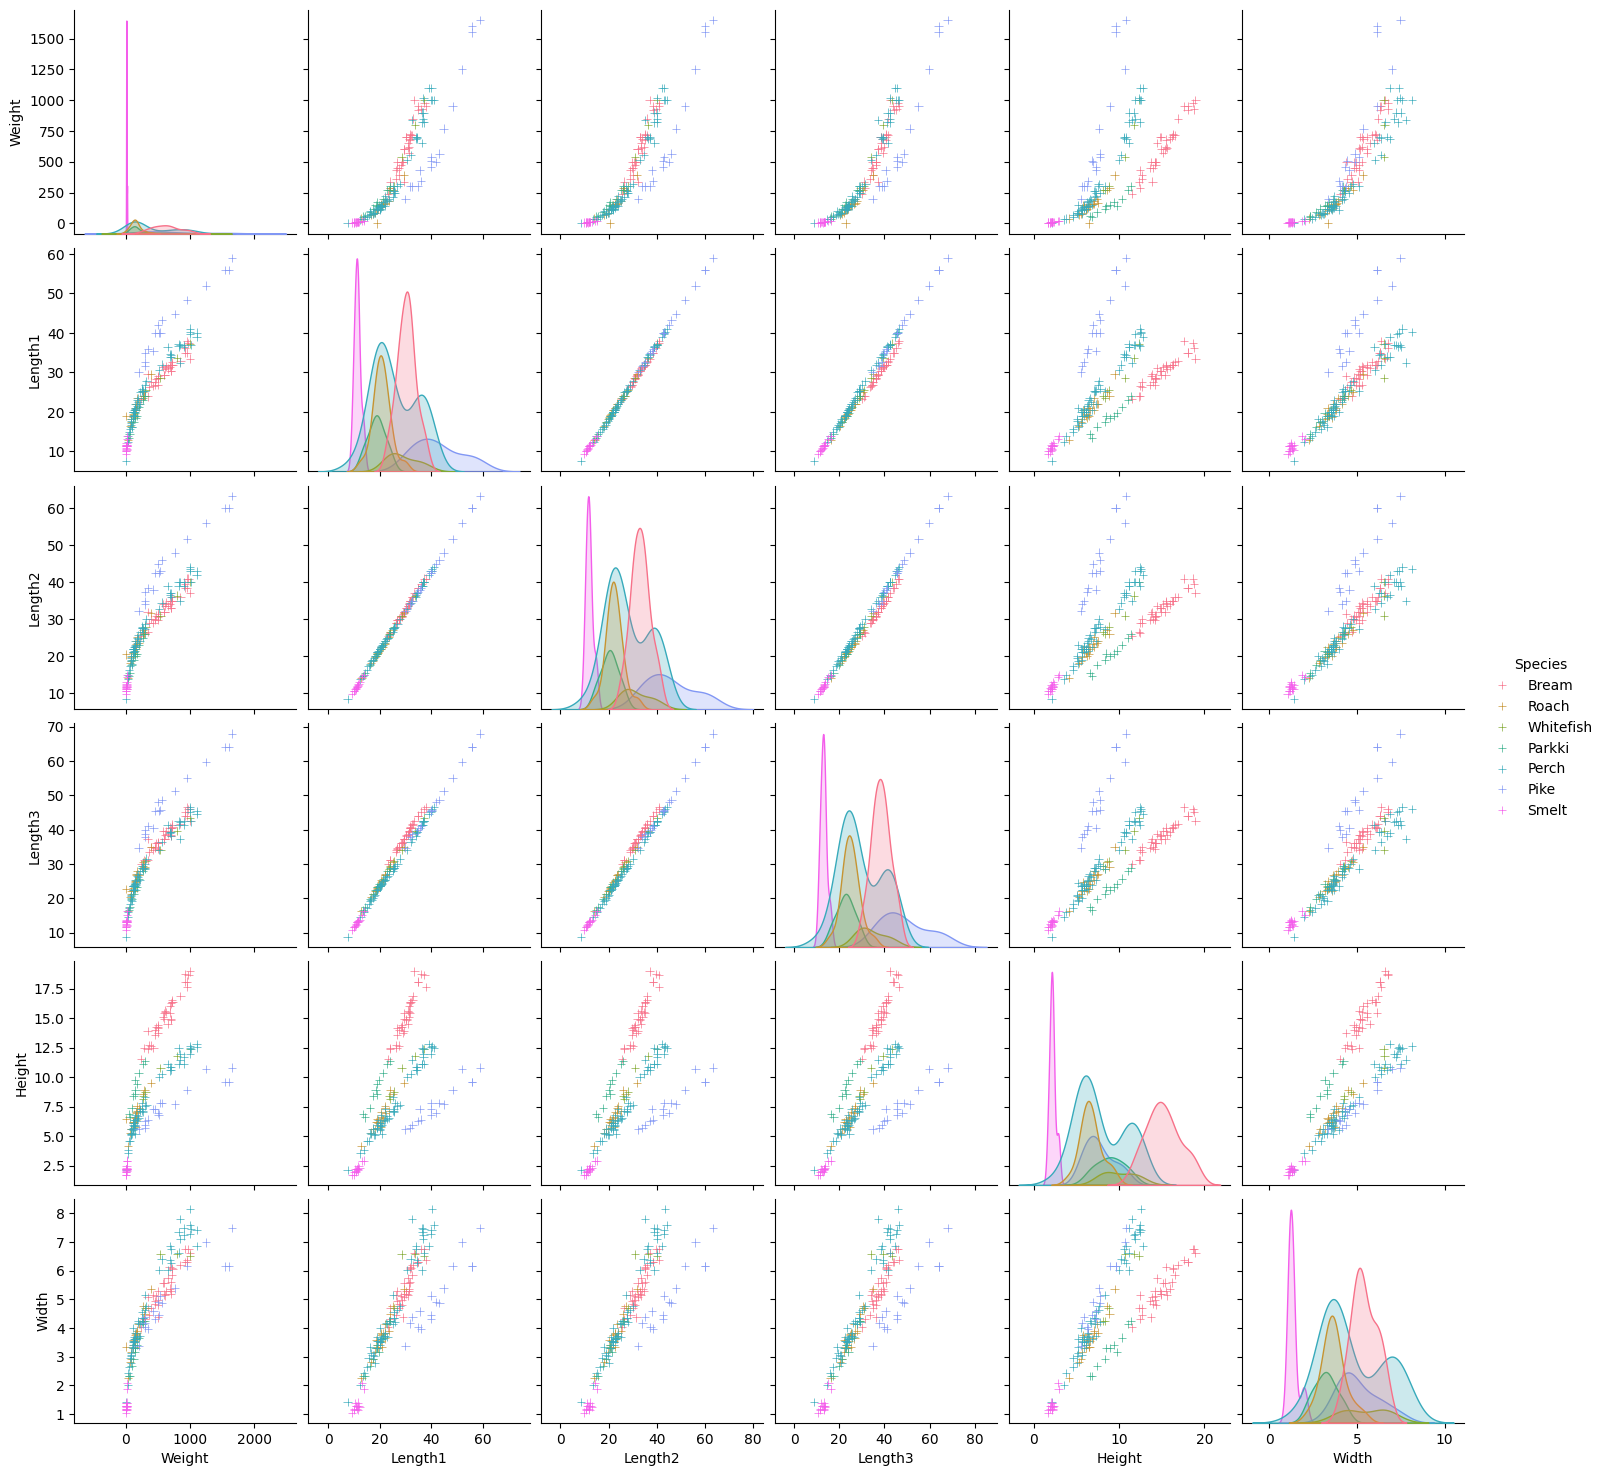

In [ ]:
# Парный график
#Построение нескольких попарных двумерных распределений в наборе данных с помощью pairplot:

sns.pairplot(dataset, hue='Species', markers='+')
plt.show()

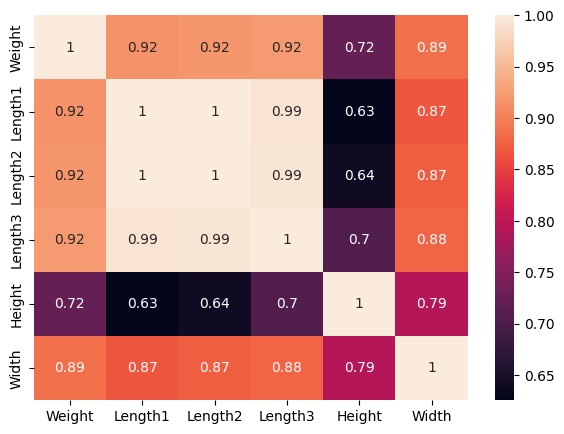

In [ ]:
# Тепловая карта
# Построение тепловой карты для проверки корреляции.
# dataset.corr() используется для поиска попарной корреляции всех столбцов в кадре данных.

plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(numeric_only = True), annot=True)
plt.show()

# Построение модели

## Разделение набора данных

Y  - целевая переменная, которую предсказываем. Мы ищем зависимость этой переменной от соответствующих фич.  В нашем случае это столбец Species.

В X складываем весь набор данных без целевой переменной.

In [ ]:
X = dataset.drop(['Species'], axis=1)
y = dataset['Species']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (159, 6) | y shape: (159,) 


X имеет 159 строк и 6 столбцов, тогда как Y имеет 159 строк и только один столбец.


## Train Test разделение

Разделяем наш набор данных на обучающий (train) и тестовый (test) с помощью train_test_split(), мы берем 80% данных для обучения нашей модели и 20% оставляем в качестве проверочного набора данных:

In [ ]:
import scipy.stats as stats

y_mapped = y.map({'Perch': 0, 'Bream': 1, 'Roach': 2, 'Pike': 3, 'Smelt': 4, 'Parkki': 5, 'Whitefish': 6})

# почему важно перемешивать и делать train и test статистически не различимыми по целевой переменной
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.30, shuffle=False)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=-2.388881836960651, pvalue=0.01808686355771074, df=157.0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.20, random_state=15, stratify=y_mapped)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=-0.006186198499379108, pvalue=0.9950720127208584, df=157.0)

## Обучение и выбор оптимальной модели

Далее попробуем следующие алгоритмы:

Logistic Regression (LR) </br>
Linear Discriminant Analysis (LDA)</br>
K-Nearest Neighbors (KNN)</br>
Classification and Regression Trees (CART)</br>
Gaussian Naive Bayes (NB)</br>
Support Vector Machines (SVM)</br>

In [ ]:
# Создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# Оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/mod

LR: 0.960256 (0.039806)
LDA: 0.976282 (0.036268)
KNN: 0.607051 (0.054094)
CART: 0.716026 (0.081340)
NB: 0.544231 (0.103102)
SVC: 0.488462 (0.086232)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


LogisticRegression и LinearDiscriminantAnalysis показали лучшие метрики среди всех алгоритмов.
Далее работаем с LinearDiscriminantAnalysis.

Давайте обучим модель LDA на нашем обучающем наборе и сделаем прогноз на тестовом наборе на следующем шаге.

## Обучение конкретной модели
Определяем нашу модель LDA
После этого подгоняем/обучаем модель на X_train и Y_train с помощью метода .fit().
Затем мы делаем прогноз на X_test с помощью метода .predict().

In [ ]:
sk_lda = LinearDiscriminantAnalysis(solver='eigen')
sk_lda.fit(X_train, y_train)
sk_lda_pred_res = sk_lda.predict(X_test)
sk_transformed = sk_lda.transform(X_train)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)

print(f'sk LDA accuracy: {sk_lda_accuracy}')
print(f'sk LDA prediction: {sk_lda_pred_res}')
print('sk transformed features', sk_transformed[:5].T, sep='\n')

sk LDA accuracy: 0.96875
sk LDA prediction: [1 2 0 5 6 0 5 0 3 2 1 0 0 1 1 2 3 0 1 0 4 3 0 0 1 2 0 4 4 3 4 1]
sk transformed features
[[-17.65853892 -16.80604218  -2.4884158   -3.96388801  -4.44071886]
 [ -8.2778933   -9.10205787 -17.02982624  -6.41817965  -8.14134697]
 [  7.2810836    6.35246269   4.39554411   8.09763156   3.82506362]
 [ -0.95404504   0.74876172  -4.89512801  -4.64007085  -2.42163967]
 [ -1.31165118  -3.35175605  -3.92596853  -2.12740412  -3.26461024]
 [ -0.25279076  -1.357178    -0.39081013  -0.8289495   -0.61638855]]


## Визуализация решения

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: title={'center': 'LDA surface with original features'}>

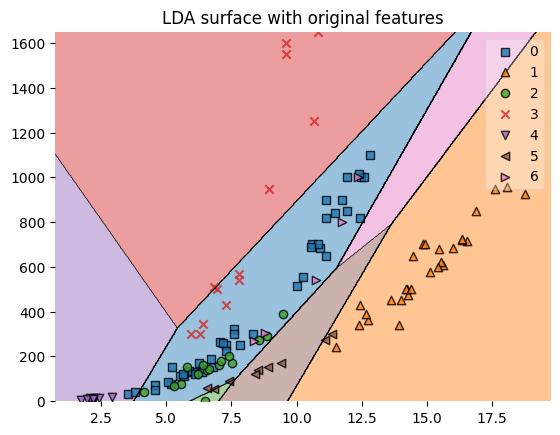

In [ ]:
from mlxtend.plotting import plot_decision_regions

# Создадим целевой вектор y_2d
y_s = y_train
X_2d= X_train[['Height',	'Weight']].values

y_2d = y_s.values


sk_lda1 = LinearDiscriminantAnalysis(solver='eigen')
sk_lda1.fit(X_2d, y_2d)

plt.title('LDA surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


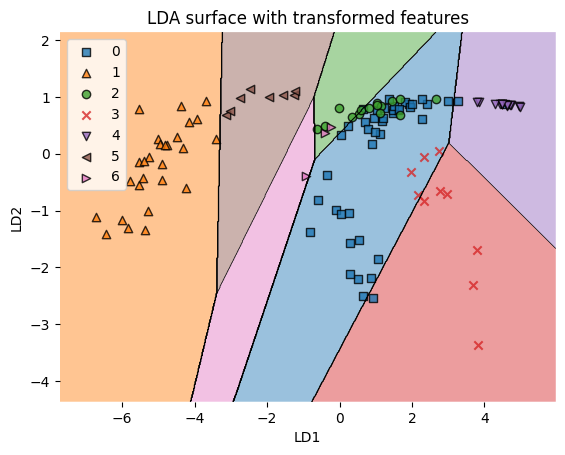

In [ ]:
# Кодируем целевую переменную
df = dataset["Species"].map({'Perch': 0, 'Bream': 1, 'Roach': 2, 'Pike': 3, 'Smelt': 4, 'Parkki': 5, 'Whitefish': 6})

# Признаки
Xs = dataset[['Height', 'Weight']]
ys = df.values

# Применяем LDA
sk_lda2 = LinearDiscriminantAnalysis(n_components=2)  # Указываем количество компонент
X1_lda = sk_lda2.fit(Xs, ys).transform(Xs)  # Используем Xs вместо X

# Разделяем на обучающую и тестовую выборки
X1_lda_train, X1_lda_test, y1_train, y1_test = train_test_split(X1_lda, ys, random_state=0)

# Обучаем модель на обучающих данных
sk_lda2.fit(X1_lda_train, y1_train)

# Визуализация
plt.title('LDA surface with transformed features')
plot_decision_regions(X=X1_lda_train, y=y1_train, clf=sk_lda2)  # Используем обучающие данные для визуализации
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='upper left')
plt.show()

In [ ]:
predicted = sk_lda2.predict(X1_lda_test)

In [ ]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

# Accuray e AUC
# Теперь смотрим метрики.
accuracy = metrics.accuracy_score(y1_test, predicted)#Оценим точность классификации.

# Precision e Recall
recall = metrics.recall_score(y1_test, predicted, average="weighted")
precision = metrics.precision_score(y1_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y1_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Recall (all 1s predicted right): 0.7
Precision (confidence when predicting a 1): 0.65
Detail:
              precision    recall  f1-score   support

           0       0.62      1.00      0.76        13
           1       1.00      1.00      1.00         8
           2       0.43      0.60      0.50         5
           3       1.00      0.43      0.60         7
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3

    accuracy                           0.70        40
   macro avg       0.58      0.58      0.55        40
weighted avg       0.65      0.70      0.64        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:14